In [151]:
# importing requited libraries
import random
import numpy as np
import pandas as pd
import math
import ssl
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, MinMaxScaler)
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor)
from sklearn.model_selection import (cross_val_score, train_test_split, GridSearchCV, learning_curve, cross_validate, RandomizedSearchCV)
from sklearn.linear_model import (LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Ridge, ElasticNet, Lasso)
from sklearn.metrics import (mean_squared_error, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, roc_curve, r2_score)

# **Data Exploration**

In [ ]:
# converting csv to dataframe
bike_share = pd.read_csv("bike_share_hour.csv", skipinitialspace=True)
print(bike_share.shape)
print(bike_share.info())

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
# converting to pandas category type
bike_share[['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']] = bike_share[['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']].astype('category')
print(bike_share.info())

bike_share.isnull().sum()

# describing numerical variables
bike_share.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB
None


,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/959769442.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=['1', '2', '3', '4'], y=bike_share.groupby(['season']).sum()['cnt'])


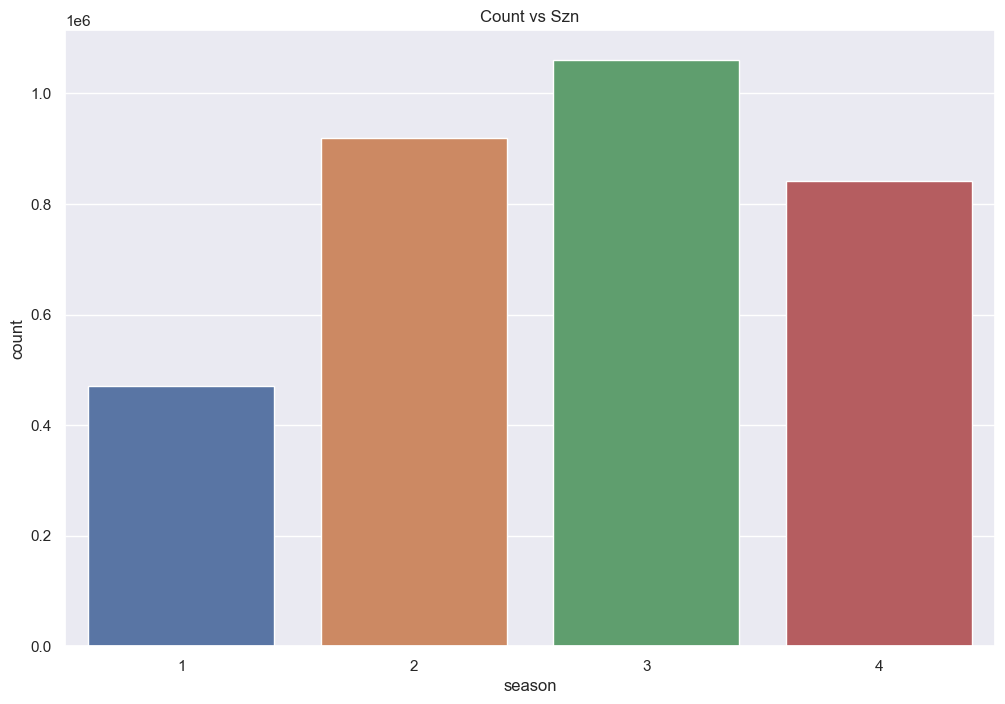

In [ ]:
# barplot of count vs season
sns.barplot(x=['1', '2', '3', '4'], y=bike_share.groupby(['season']).sum()['cnt'])
plt.title('Count vs Szn')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

### __Observation:__

__Season 1 had the lowest number of bikes, while season 3 had the most.__

/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/4201359607.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=['0', '1'], y=bike_share.groupby(['workingday']).sum()['cnt'])


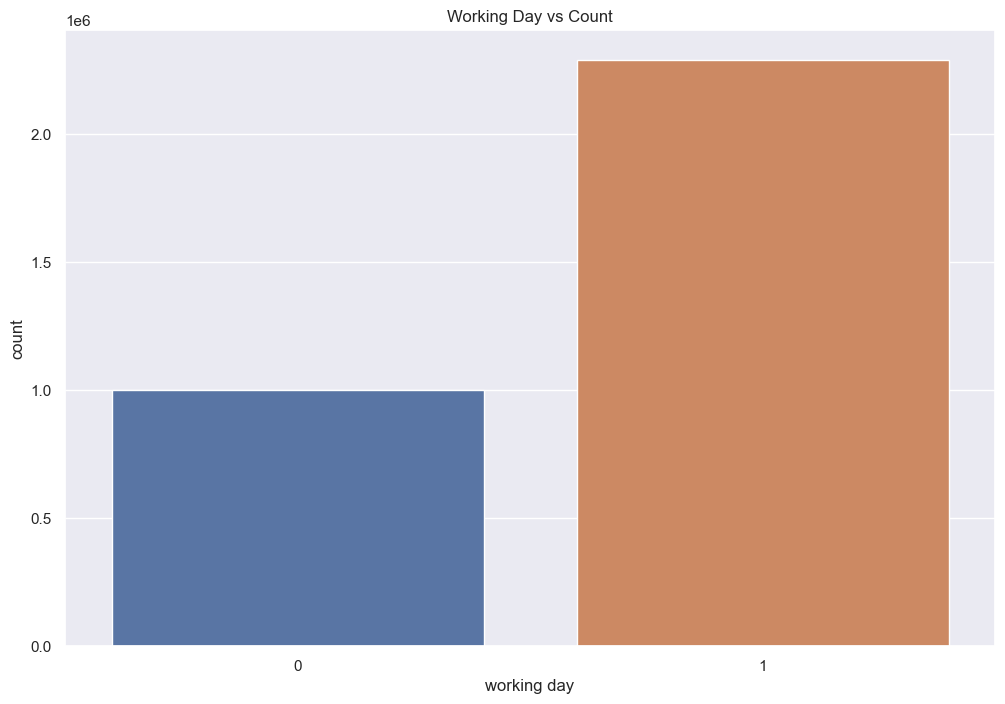

In [ ]:
# working day vs count bar chart
sns.barplot(x=['0', '1'], y=bike_share.groupby(['workingday']).sum()['cnt'])
plt.title('Working Day vs Count')
plt.xlabel('working day')
plt.ylabel('count')
plt.show()

### __Observation:__

 __During the holidays and weekends, there are less bike rental than on working days.__

/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/2829407523.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=mnths, y=bike_share.groupby(['mnth']).sum()['cnt'])


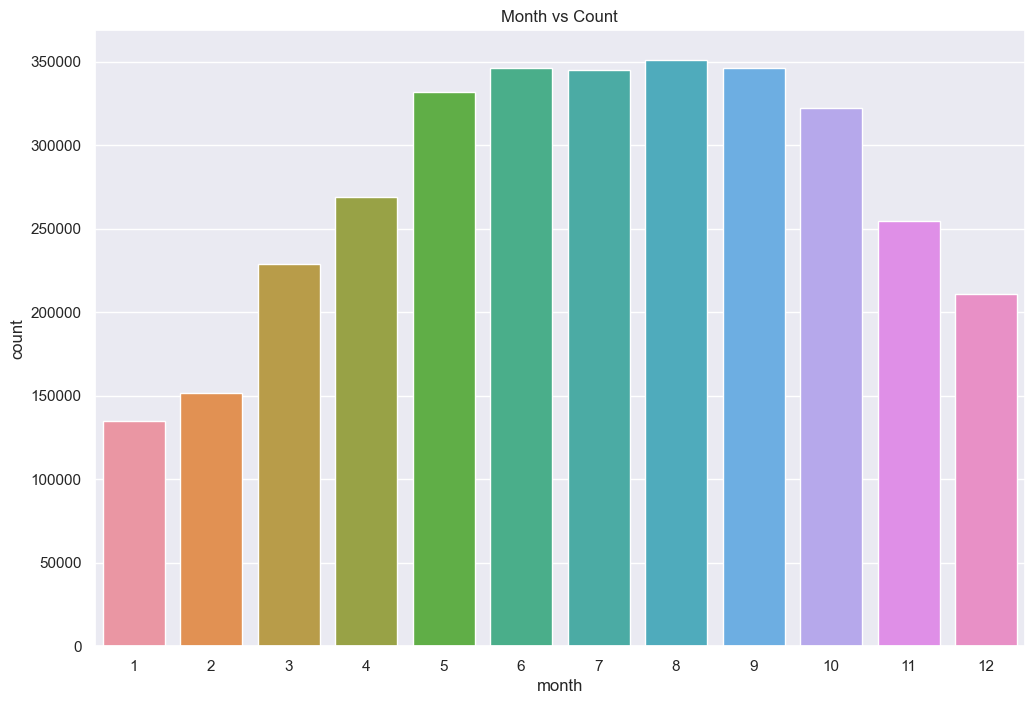

In [ ]:
# month vs count bar chart
mnths = list(bike_share['mnth'].unique())
sns.barplot(x=mnths, y=bike_share.groupby(['mnth']).sum()['cnt'])
plt.title('Month vs Count')
plt.xlabel('month')
plt.ylabel('count')
plt.show()

In [ ]:
# grouping months and seasons
szns = [1, 2, 3, 4]
months_szns = bike_share[['season','mnth']].drop_duplicates()
for s in szns:
    print("Season", s,":", list(months_szns[months_szns['season']==s]['mnth']))

Season 1 : [1, 2, 3, 12]
Season 2 : [3, 4, 5, 6]
Season 3 : [6, 7, 8, 9]
Season 4 : [9, 10, 11, 12]


### **Observation:**

__The 8th month had the highest amount of bike rentals and then there was months 6,9, and 7.__

/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/4234346651.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=weather, y=bike_share.groupby(['weathersit']).sum()['cnt'])


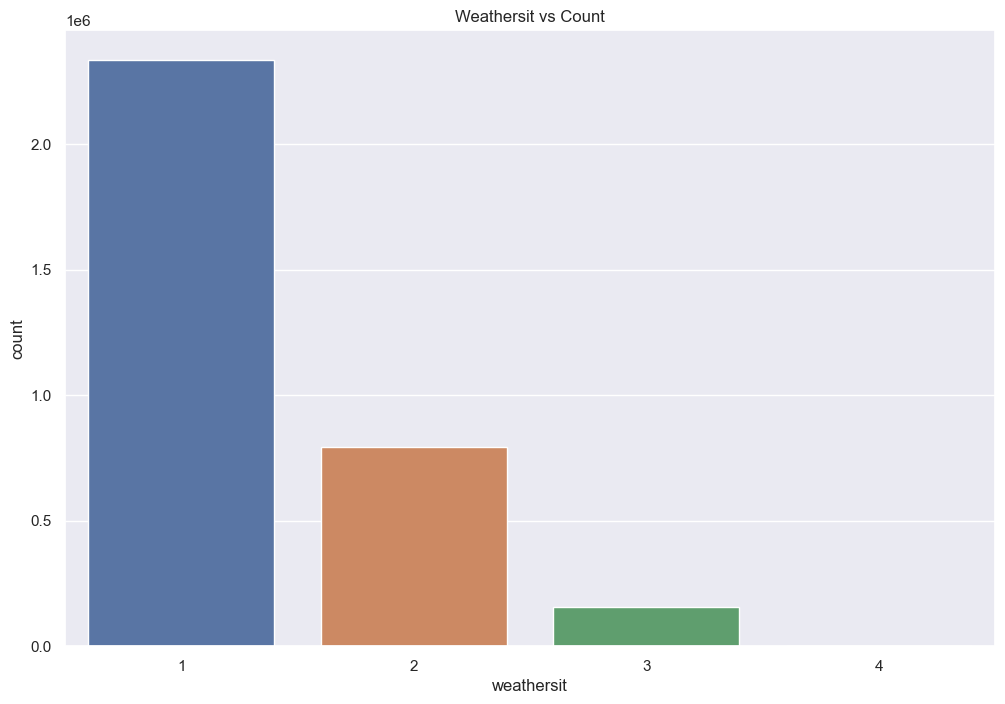

In [ ]:
# weathersit vs count bar plot
weather = list(bike_share['weathersit'].unique())
sns.barplot(x=weather, y=bike_share.groupby(['weathersit']).sum()['cnt'])
plt.title('Weathersit vs Count')
plt.xlabel('weathersit')
plt.ylabel('count')
plt.show()


### __Observation:__

__Weathersit #4 has the lowest number of bike rentals.__

Text(0, 0.5, 'count')

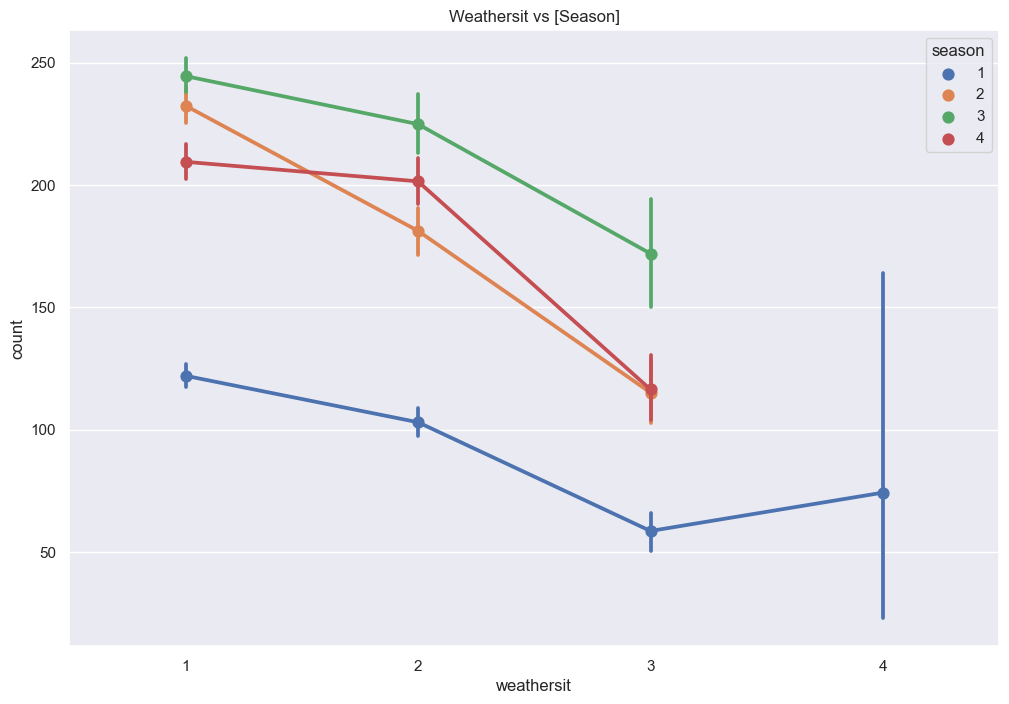

In [ ]:
# pointplot of weathersit vs count by season
sns.pointplot(data=bike_share, x='weathersit', y='cnt', hue='season')
plt.title('Weathersit vs [Season]')
plt.xlabel('weathersit')
plt.ylabel('count')

### __Observation:__
__As severe weather increases, the amount of bike rentals decreases.__

/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/1143433081.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=hours, y=bike_share.groupby(['hr']).sum()['cnt'])


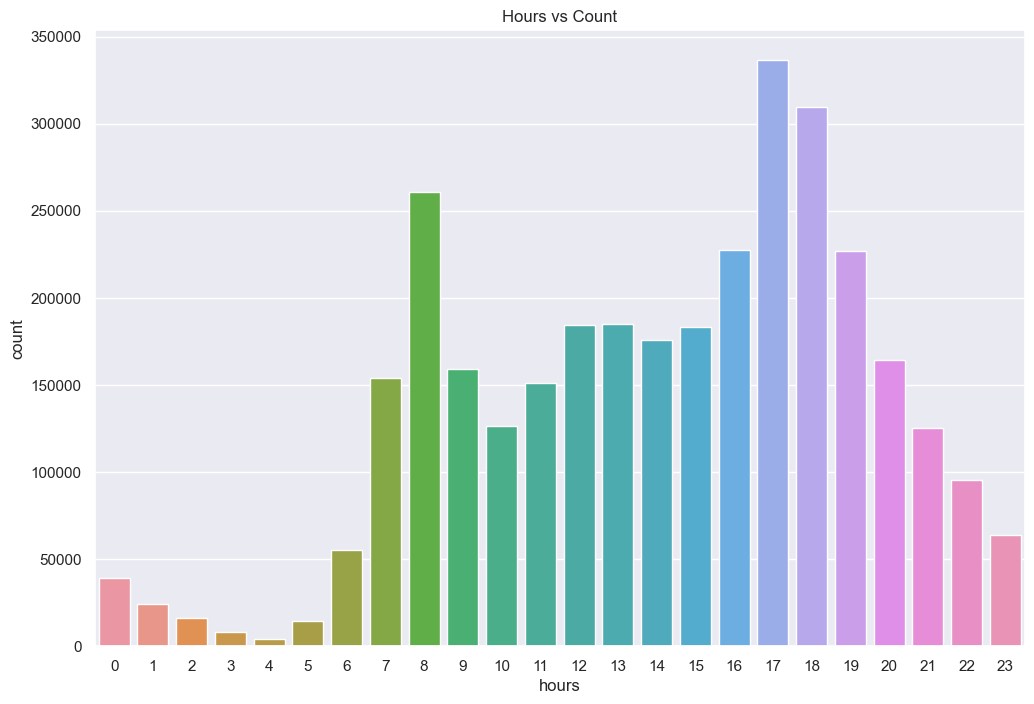

In [ ]:
# bar plot of hours vs count
hours = list(bike_share['hr'].unique())
sns.barplot(x=hours, y=bike_share.groupby(['hr']).sum()['cnt'])
plt.title('Hours vs Count')
plt.xlabel('hours')
plt.ylabel('count')
plt.show()

### __Observation:__

__The bike rentals are the highest on hours 17 followed by 18 and 8.__

/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/4204640491.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=hour, y=wknds_holis.groupby(['hr']).sum()['cnt'])


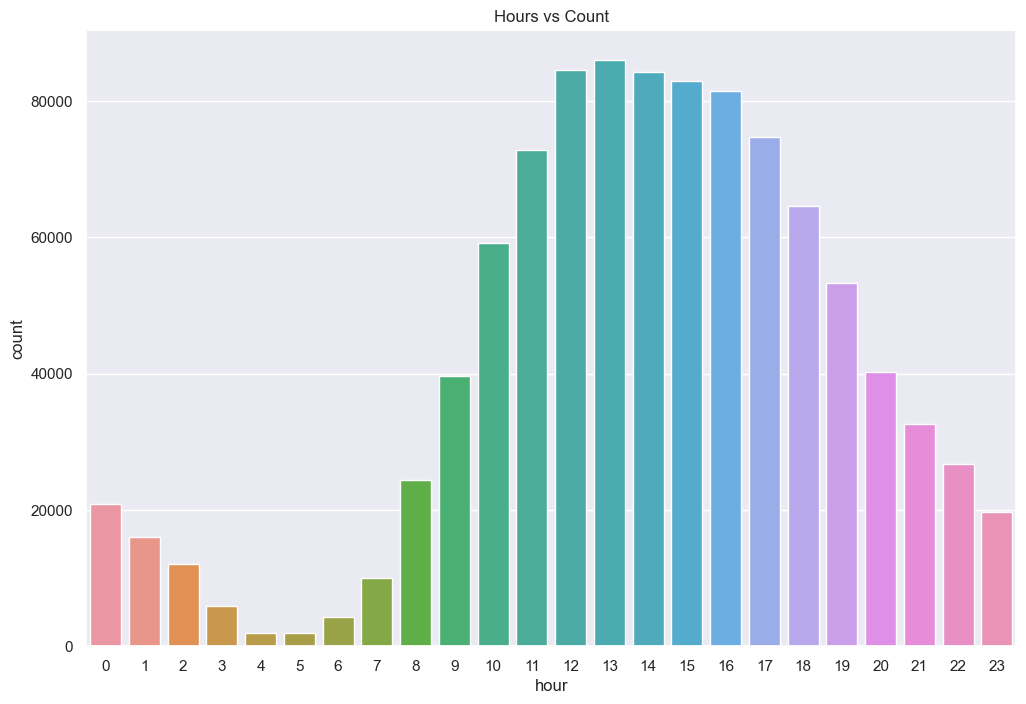

In [ ]:
# hours vs count on weeekends & holidays
wknds_holis = bike_share[bike_share['workingday'] == 0]
hour = list(wknds_holis['hr'].unique())
sns.barplot(x=hour, y=wknds_holis.groupby(['hr']).sum()['cnt'])
plt.title('Hours vs Count')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

### __Observation:__

__The trend does change on the weekends. Bike rentals are more consistent throughout the day.__

# __Data Preparation__
o Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?
o Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.
o Drop the following columns from your dataset: casual, registered, dteday, instant.
o Implement a histogram of the count column. What can be said based on the resulting distribution?
o Implement a train/test split with a test size of 33%.
o Implement a baseline linear regression algorithm. Use cross-validation to
output r2 and mse. Calculate RMSE base on mse. Document your scores.__

/var/folders/q7/wvzkp1bs2v52kjpwsjptryd40000gn/T/ipykernel_39037/1497070313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = bike_share.corr()


             instant        hr      temp     atemp       hum  windspeed  \
instant     1.000000 -0.004775  0.136178  0.137615  0.009577  -0.074505   
hr         -0.004775  1.000000  0.137603  0.133750 -0.276498   0.137252   
temp        0.136178  0.137603  1.000000  0.987672 -0.069881  -0.023125   
atemp       0.137615  0.133750  0.987672  1.000000 -0.051918  -0.062336   
hum         0.009577 -0.276498 -0.069881 -0.051918  1.000000  -0.290105   
windspeed  -0.074505  0.137252 -0.023125 -0.062336 -0.290105   1.000000   
casual      0.158295  0.301202  0.459616  0.454080 -0.347028   0.090287   
registered  0.282046  0.374141  0.335361  0.332559 -0.273933   0.082321   
cnt         0.278379  0.394071  0.404772  0.400929 -0.322911   0.093234   

              casual  registered       cnt  
instant     0.158295    0.282046  0.278379  
hr          0.301202    0.374141  0.394071  
temp        0.459616    0.335361  0.404772  
atemp       0.454080    0.332559  0.400929  
hum        -0.347028   -

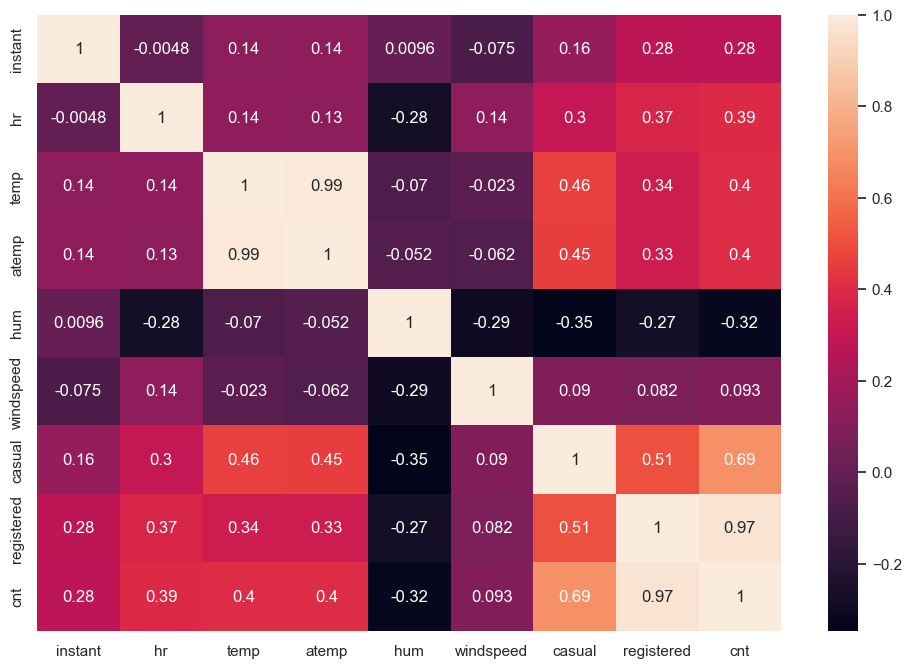

In [ ]:
# implementation a correlation matrix with remaining numeric features
corr_m = bike_share.corr()
print (corr_m)
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(corr_m, annot=True)
plt.show()

### __Observation:__

__There are a few interesting relationships worth nothing. 'temp' & 'atemp' are highly correlated as well as 'registered' & 'count'.__

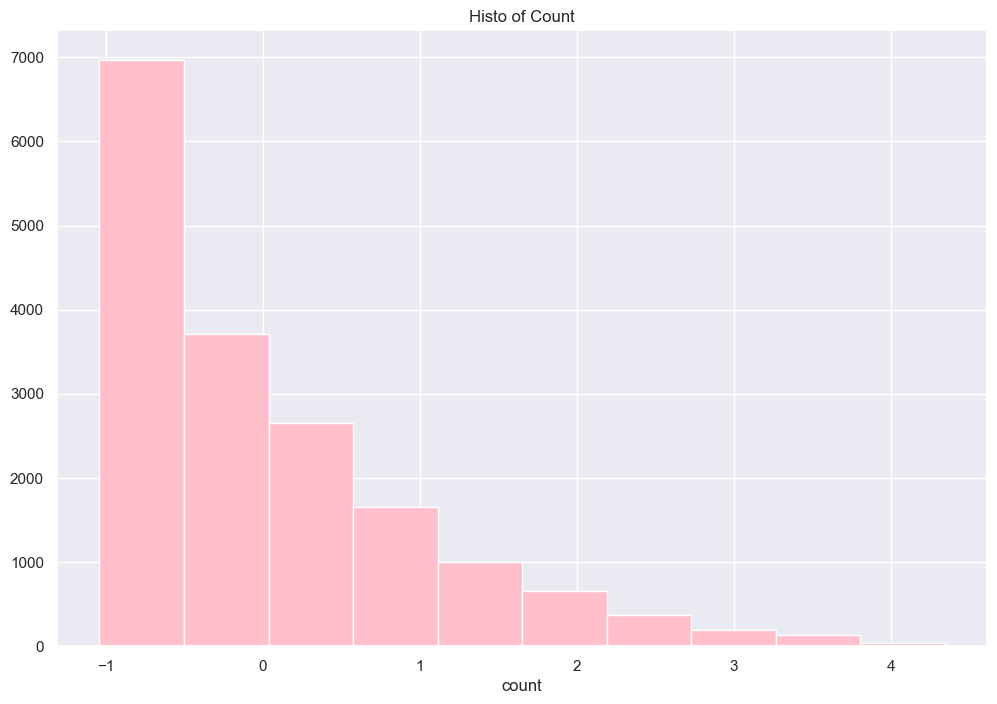

In [ ]:
# scaling numerical features
for col in ['instant', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
    arr = np.array(bike_share[col])
    scaler = StandardScaler()
    scaler.fit(arr.reshape(-1,1))
    bike_share[col]=scaler.transform(arr.reshape(-1,1))

# dropping required columns
bike_share.drop(columns = ['casual', 'registered', 'dteday', 'instant'], inplace = True)

# histogram of count
plt.hist(x = bike_share['cnt'], color = 'pink')
plt.title('Histo of Count')
plt.xlabel('count')
plt.show()

### __Observation:__

__It can be observed that bike rentals are more common at the lower counts.__

In [ ]:
# test train split where test = .33
X = bike_share.drop('cnt', axis=1)
y = bike_share['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# baseline LR algorithm & calculating MSE
lm = LinearRegression()
lm.fit(X_train, y_train)
r2 = cross_val_score(lm, X_train, y_train, scoring='r2')
mse = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error')
mse = -mse
rmse = np.sqrt(mse)
print("\nR2:", r2.mean())
print("\nMSE mean:", mse.mean())
print("\nRMSE mean:", rmse.mean())


R2: 0.38506139505029086

MSE mean: 0.6234480824773813

RMSE mean: 0.7894616753334466


# __Model Training__ 

In [ ]:
# uisng one-hot-encoded values
for col in ['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']:
    temp = pd.get_dummies(bike_share[col], prefix=col)
    bike_share = bike_share.join(temp)

# dropping original categorical columns
bike_share = bike_share.drop(['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit'], axis=1)

# test train split based on new source dataset
X = bike_share.drop('cnt', axis=1)
y = bike_share['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

# populating new values for R2, MSE, and RMSE
r2 = cross_val_score(lm, X_train, y_train, scoring='r2')
mse = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error")
mse = -mse
rmse = np.sqrt(mse)
print("\nR2:", r2.mean())
print("\nMSE mean:", mse.mean())
print("\nRMSE mean:", rmse.mean())


R2: -1.0619812120888271e+22

MSE mean: 1.0228803001738307e+22

RMSE mean: 45230085124.88548


In [153]:
# decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("Decision Tree Mean Squared Error:", mse_decision_tree)

# random forest Regressor
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Random Forest Mean Squared Error:", mse_random_forest)

# SGD Regressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
sgd_regressor.fit(X_train, y_train)
y_pred_sgd = sgd_regressor.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("SGD Regressor Mean Squared Error:", mse_sgd)

# lasso Regressor
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)
y_pred_lasso = lasso_regressor.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regressor Mean Squared Error:", mse_lasso)

# elasticnet Regressor
elastic_net_regressor = ElasticNet(random_state=0)
elastic_net_regressor.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_regressor.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("ElasticNet Regressor Mean Squared Error:", mse_elastic_net)

# ridge Regressor
ridge_regressor = Ridge(alpha=0.5)
ridge_regressor.fit(X_train, y_train)
y_pred_ridge = ridge_regressor.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regressor Mean Squared Error:", mse_ridge)

# bagging Regressor
bagging_regressor = BaggingRegressor(random_state=0)
bagging_regressor.fit(X_train, y_train)
y_pred_bagging = bagging_regressor.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print("Bagging Regressor Mean Squared Error:", mse_bagging)

Decision Tree Mean Squared Error: 0.11105019130004731
Random Forest Mean Squared Error: 0.05460658271596853
SGD Regressor Mean Squared Error: 0.5730151304606729
Lasso Regressor Mean Squared Error: 0.653860311757378
ElasticNet Regressor Mean Squared Error: 0.9705217365315253
Ridge Regressor Mean Squared Error: 0.5728432555732013
Bagging Regressor Mean Squared Error: 0.06172217286532448


# **Model Tuning**

### **Running the predictions on your test set with this model; observing r2 score, and RMSE.**

In [154]:
# top 3 models; implementing cross-validation
for model in [DecisionTreeRegressor(random_state=0), RandomForestRegressor(random_state=0, n_estimators=30), BaggingRegressor()]:
    model.fit(X_train, y_train)
    scores = cross_validate(model, X_train, y_train, scoring=('r2', 'neg_mean_squared_error'))
    rmse = np.sqrt(-scores['test_neg_mean_squared_error'])
    print()
    print(model)
    print("R2:", scores['test_r2'].mean())
    print("MSE mean:", (-scores['test_neg_mean_squared_error'].mean()))
    print("RMSE mean:", rmse.mean())



DecisionTreeRegressor(random_state=0)
R2: 0.8731247599576687
MSE mean: 0.12858912500468295
RMSE mean: 0.3581945444148489

RandomForestRegressor(n_estimators=30, random_state=0)
R2: 0.9341869737882661
MSE mean: 0.06666519607243829
RMSE mean: 0.2579349874748836

BaggingRegressor()
R2: 0.9272649027780892
MSE mean: 0.07360646656123122
RMSE mean: 0.27098257367665995


In [156]:
# doing a randomized search cv
new_params = {'bootstrap': (True, False),
              'max_depth': np.arange(10, 110, 11),
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'n_estimators': np.arange(200, 2000, 10)
             }

rfr_grid = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=new_params, cv=3, n_jobs=3, n_iter=20)
rfr_grid.fit(X_train, y_train)
print(rfr_grid.best_estimator_)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

RandomForestRegressor(max_depth=54, max_features='auto', n_estimators=780)


In [157]:
# best estimator through cross-valuess for r2, MSE, and RMSE calculation
rfr = rfr_grid.best_estimator_
rfr.fit(X_train, y_train)
r2 = cross_val_score(rfr, X_train, y_train, scoring='r2')
mse = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error")
mse = -mse
rmse = np.sqrt(mse)
print("\nR2:", r2.mean())
print("\nMSE mean:", mse.mean())
print("\nRMSE mean:", rmse.mean())

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d


R2: 0.9369895511024057

MSE mean: 0.06374812449220743

RMSE mean: 0.2521876733652165


In [158]:
# run predictions with model: r2, RMSE
prediction = rfr.predict(X_test)
print("\nR2 score:", r2_score(y_test, prediction))
print("\nRSME score:", mean_squared_error(y_test, prediction, squared=False))


R2 score: 0.9442041297281201

RSME score: 0.23260076804906274
